# Ch5 - Stats

**Statistics** = mathematics and techniques with which we understand data, a rich, enormous field

Below is just enough to be dangerous.

## Describing a Single Set of Data

The social network has grown to dozens of members, and VP of Fundraising asks for some sort of description of how many friends the members have such that he can include the info his in elevator pitches.

One obvious description of any data set is simply the data itself:

In [7]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

For a small enough data set this might even be the best description. But for a larger data set, this is unwieldy and opaque. (i.e. staring at a list of 1 million numbers.)

For that reason, we use stats to distill + communicate relevant features of the data.

A first approach = put friend counts into a histogram using `Counter` + `plt.bar()`

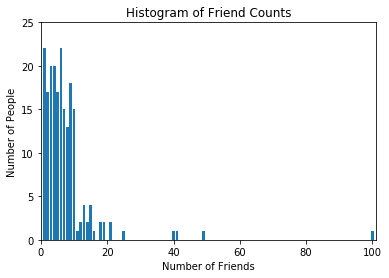

In [8]:
%matplotlib inline

from collections import Counter
from matplotlib import pyplot as plt

friend_counts = Counter(num_friends)
x_ax = range(101) # largest val = 100
y_ax = [friend_counts[x] for x in x_ax] # height = # of friends
plt.bar(x_ax,y_ax)
plt.axis([0,101, 0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of Friends")
plt.ylabel("Number of People")
plt.show()

In [9]:
# number of DPs in dataset
dps = len(num_friends)

# get min and max
min_friends = min(num_friends)
max_friends = max(num_friends)

print(dps,min_friends,max_friends)

204 1 100


In [10]:
# get min and max via sorting + indices
sorted_values = sorted(num_friends)

min_friends = sorted_values[0]
max_friends = sorted_values[-1]

print(dps,min_friends,max_friends)

204 1 100


In [11]:
# get 2nd smallest and 2nd largest number of friends
second_smallest_friends = sorted_values[1]
second_largest_friends = sorted_values[-2]

print(dps,second_smallest_friends,second_largest_friends)

204 1 49


### Central Tendencies

One usually want some notion of where the data is centered, typically using the mean

In [12]:
from __future__ import division # for float point division w/ "/", int division w/ "//"

def mean(x):
    """x is a vector"""
    return sum(x)/len(x)
mean(num_friends)

7.333333333333333

W/ more DP's, the mean shifts around, but it *always* depends on the value of *every* point, meaning it is susceptible to effects from outliers and non-normal distributions.

In such a case, we use median = the middle-most value (if # of DP's is odd) or the average of the  middle-most values (if # 
of DP's is even).

For instance, if we have 5 DP's in a sorted vector x, the median is `x[5 // 2]` or `x[2]`. If we have 6 DP's, we want the average of `x[2]` (3rd DP) and `x[3]` (4th DP).

Unlike mean — median doesn’t depend on every value in your data. If you make the largest point larger (or smallest point smaller), middle points remain unchanged, so too does the median.

The median function is slightly more complicated than expected, mostly because of the “even” case:

In [14]:
def median(x):
    """x is a vector"""
    n = len(x)
    sorted_x = sorted(x)
    midpoint = n // 2 # integer division = no remainder, rounded
    
    # if n = odd, get middle-most value
    if n % 2 == 1:
        median = x[midpoint]
    # if even, get average of 2 middle-most points
    else:
        mid_low = midpoint - 1
        mid_high = midpoint
        median = (sorted_x[mid_low] + sorted_x[mid_high]) / 2
    return median
median(num_friends)

6.0

In [16]:
# 2 lines less of code = return within the IF
def median2(x):
    """x is a vector"""
    n = len(x)
    sorted_x = sorted(x)
    midpoint = n // 2 # integer division = no remainder, rounded
    
    # if n = odd, get middle-most value
    if n % 2 == 1:
        return x[midpoint]
    # if even, get average of 2 middle-most points
    else:
        mid_low = midpoint - 1
        mid_high = midpoint
        return (sorted_x[mid_low] + sorted_x[mid_high]) / 2
median2(num_friends)

6.0

Mean is simpler to compute, and varies smoothly as data changes. If we have `n` DP's and one increases by some small amount , `e`, then, necessarily,  the mean will increase by `e / n`. (makes the mean amenable to all sorts of calculus tricks.)

Whereas in order to find the median, we must *sort* our data, and changing a DP by a small amount `e` might increase the median by `e`, by some number less than `e`, or not at all (depending on the rest of the data).

*Note*: There are nonobvious tricks to efficiently compute medians without sorting the data (beyond the scope of this book, so we sort the data).

But, mean is very sensitive to outliers. If our friendliest user had 200 friends (instead of 100), the mean would rise to 7.82, while the median would stay the same. If outliers are likely to be bad data (or otherwise unrepresentative of whatever phenomenon we’re trying to understand), the mean can sometimes give us a misleading picture. 

For example, in the mid-1980s, the major at UNC with the highest average starting salary was geography, mostly on account of NBA star (and outlier) Michael Jordan.

A generalization of the median is the **quantile**, which represents the value *less* than which a certain percentile of  data lies. (median = the value less than which 50% of the data lies).

In [17]:
def quantile(x,p):
    """x is a vector, p is pth percentile value in x"""
    p_index = int((p/100)*len(x)) # i.e. median = 50th percentile = .5*len(x) = middlemost value
    return sorted(x)[p_index] # get the value which pth% of the data is below

print(quantile(num_friends,90)
,quantile(num_friends,10)
,quantile(num_friends,50)
,quantile(num_friends,25)
,quantile(num_friends,75))

13 1 6 3 9


In [25]:
# most common value
def mode(x):
    """returns a list as there may be > 1 mode"""
    counts = Counter(x) # enumerable with counts of value in x
    max_count = max(counts.values())
    # get the index for the max count value
    return [xi for xi, count in counts.items()
           if count == max_count] # .iteritems() in Python2.7

mode(num_friends)

[6, 1]

### Dispersion
This refers to measures of how spread out our data is. Typically, they’re statistics for which values near zero signify *not spread out at all* and for which large values signify *very spread out*.

Very simple measure = range == difference between the largest and smallest elements:

In [26]:
def data_range(x):
    return max(x) - min(x)
data_range(num_friends)

99

The range = 0 when max and min are equal, which can only happen if all elements of x are all the same, which means the data is as undispersed as possible. Conversely, if range is large, the max is much larger than the min and the data is more spread out.

Like the median, the range doesn’t really depend on the whole data set. A data set whose points are all either 0 or 100 has the same range as a data set whose values are 0, 100, and lots of 50's. But it seems like the first data set “should” be more spread out.

A more complex measure of dispersion = the **variance**, which is computed as:

In [30]:
def normalize_mean(x):
    """Transform x by subtracting the mean from each
    data point so that the resulting vector has mean = 0"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot_prod(v,w):
    # for each component in vectors the zip list, multiply it by the
    # corresponding-indexed element in the other vectors in the zipped list
    return sum(v_i*w_i           
              for v_i,w_i in zip(v,w))

## use dot product to easily compute SUM OF SQUARES of a vector
def sum_of_squares(v):
    """v1*v1 + ... + vn*vn"""
    return dot_prod(v,v)

def variance(x):
    """Assuming x has at least 2 elements"""
    n = len(x)
    deviations = normalize_mean(x)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

81.54351395730716